##IMPORTS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="horizonaks"
os.environ["KAGGLE_KEY"]="2567ab00d535e171694fb2e7f8e058db"

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 95% 197M/207M [00:01<00:00, 141MB/s]
100% 207M/207M [00:01<00:00, 116MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

##DATASET DIVISION

**Train:** 600 Images

**Test:** 100 Images

**Cross Validation:** 306 Images

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,"Train")
test_dir = os.path.join(main_dir,"Test")
valid_dir = os.path.join(main_dir,"Validation")

train_mask_dir =os.path.join(train_dir,"Mask")
train_nomask_dir =os.path.join(train_dir,"Non Mask")



In [ ]:
train_mask_names = os.listdir(train_mask_dir)
train_nomask_names = os.listdir(train_nomask_dir)

['/content/New Masks Dataset/Train/Mask/0066.jpg', '/content/New Masks Dataset/Train/Mask/0323.jpg', '/content/New Masks Dataset/Train/Mask/0719.jpg', '/content/New Masks Dataset/Train/Mask/0188.jpg', '/content/New Masks Dataset/Train/Mask/1340.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg', '/content/New Masks Dataset/Train/Mask/0558.jpg', '/content/New Masks Dataset/Train/Mask/1160.jpg', '/content/New Masks Dataset/Train/Non Mask/32.jpg', '/content/New Masks Dataset/Train/Non Mask/246.jpg', '/content/New Masks Dataset/Train/Non Mask/255.jpg', '/content/New Masks Dataset/Train/Non Mask/133.jpg', '/content/New Masks Dataset/Train/Non Mask/4.jpg', '/content/New Masks Dataset/Train/Non Mask/22.jpg', '/content/New Masks Dataset/Train/Non Mask/336.jpg', '/content/New Masks Dataset/Train/Non Mask/218.jpg'] 
 []


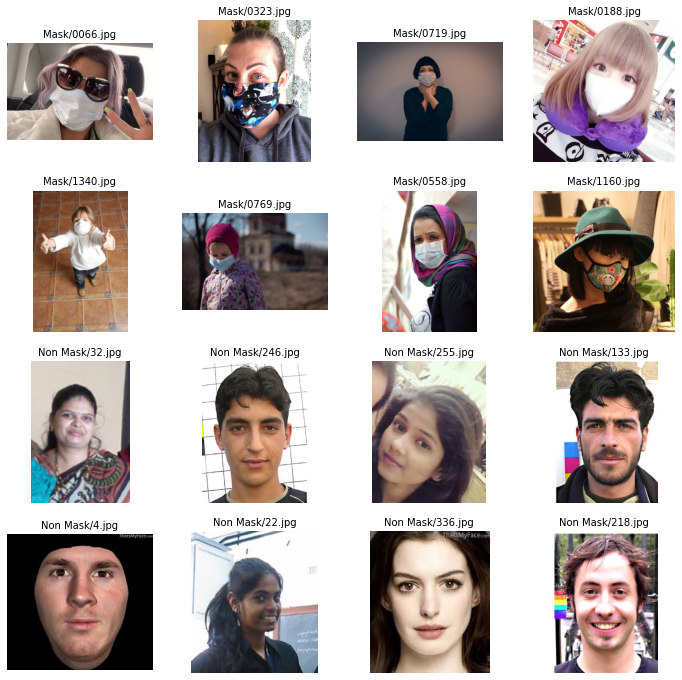

In [ ]:
import matplotlib.image as mpimg
nrows =4
ncols=4
plt.figure(figsize=(12,12))

mask_pic =[]
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic =[]
for i in train_nomask_names[0:8]:
  mask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic,"\n",nomask_pic)

merged_list = mask_pic+nomask_pic
for i in range(0,len(merged_list)):
  data = merged_list[i].split('/',4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

##DATA AUGMENTATION

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

##FACE DETECTION MODEL:

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


TRAINING...
(takes approx x Minutes)

In [ ]:
history = model.fit(train_generator,
                    epochs = 50,
                    validation_data = valid_generator)

Epoch 1/35
19/19 [==============================] - 24s 768ms/step - loss: 3.3426 - accuracy: 0.5117 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/35
19/19 [==============================] - 14s 746ms/step - loss: 0.6897 - accuracy: 0.5367 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/35
19/19 [==============================] - 14s 734ms/step - loss: 0.6901 - accuracy: 0.5417 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/35
19/19 [==============================] - 14s 742ms/step - loss: 0.6749 - accuracy: 0.5733 - val_loss: 0.6799 - val_accuracy: 0.7255
Epoch 5/35
19/19 [==============================] - 14s 746ms/step - loss: 0.5411 - accuracy: 0.7467 - val_loss: 0.5774 - val_accuracy: 0.7647
Epoch 6/35
19/19 [==============================] - 14s 739ms/step - loss: 0.3846 - accuracy: 0.8783 - val_loss: 0.5242 - val_accuracy: 0.7614
Epoch 7/35
19/19 [==============================] - 14s 748ms/step - loss: 0.3757 - accuracy: 0.8650 - val_loss: 0.3762 - val_accuracy: 0.8562

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

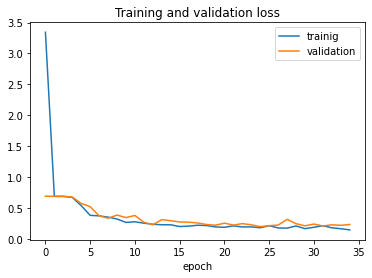

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

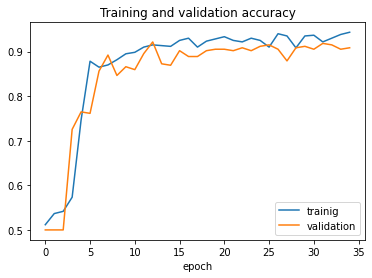

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 2s 381ms/step - loss: 0.2114 - accuracy: 0.9200
test acc :0.9200000166893005 test loss:0.21143297851085663


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

In [ ]:
model.save('model.h5')